<a href="https://colab.research.google.com/github/samsoe/matrix/blob/master/notebooks/Map_of_Landscape_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [0]:
data = read.csv("https://drive.google.com/uc?id=1LX1iFFkKi4V9YjFVMsansk4-i3rSrqbv")

In [3]:
tail(data, 4)

,year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2078,2018,481,Riparian,9.56000,fall,2018 Q4,7.381667,5.138333,46.70958,-114.0447
2079,2018,482,Riparian,0.00000,fall,2018 Q4,7.381667,5.138333,46.70839,-114.0406
2080,2018,484,Riparian,13.00667,fall,2018 Q4,7.381667,5.138333,46.70708,-114.0436
2081,2018,571,Active,12.40000,fall,2018 Q4,7.381667,5.138333,46.71035,-114.0388


In [4]:
# show only fall season is selected
unique(data$type)

[1] Range      Forest     Draw weedy Degraded   Active     irrigation Riparian  
Levels: Active Degraded Draw weedy Forest irrigation Range Riparian

## Setup ggmap

In [5]:
if(!requireNamespace("devtools")) install.packages("devtools")
devtools::install_github("dkahle/ggmap", ref = "tidyup", force=TRUE)

Loading required namespace: devtools


ggplot2     (3.2.0 -> 3.2.1 ) [CRAN]
RgoogleMaps (NA    -> 1.4.3 ) [CRAN]
png         (NA    -> 0.1-7 ) [CRAN]
rjson       (NA    -> 0.2.20) [CRAN]
jpeg        (NA    -> 0.1-8 ) [CRAN]
bitops      (NA    -> 1.0-6 ) [CRAN]
httr        (1.4.0 -> 1.4.1 ) [CRAN]
curl        (3.3   -> 4.0   ) [CRAN]


Installing 8 packages: ggplot2, RgoogleMaps, png, rjson, jpeg, bitops, httr, curl
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/RtmpNIhVl5/remotes8128811c37/dkahle-ggmap-2d756e5/DESCRIPTION’
─  preparing ‘ggmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘ggmap/.github’
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggmap_3.0.0.tar.gz’ (640ms)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [6]:
library("ggmap")

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [0]:
ggmap::register_google(key = "YOUR-API-KEY")

Source : https://maps.googleapis.com/maps/api/staticmap?center=46.700006,-114.014843&zoom=13&size=640x640&scale=2&maptype=terrain&key=xxx-2ta0tRitPyn7aa6iWD2HjNT_bED8


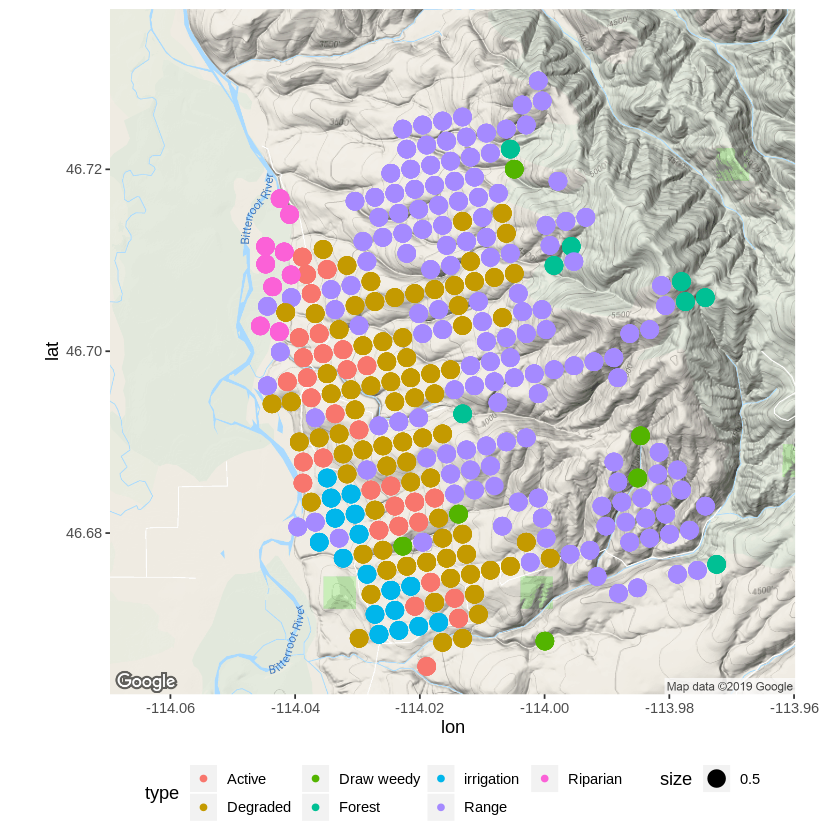

In [31]:
p <- ggmap(get_googlemap(center = c(lon = -114.014843, lat = 46.700006),
                    zoom = 13, scale = 2,
                    maptype ='terrain',
                    color = 'color'))

p + geom_point(aes(x = long, y = lat,  colour = type, size = 0.5), data = data) + 
  theme(legend.position="bottom")